In [1]:
import sys
!{sys.executable} -m pip install mlxtend
!{sys.executable} -m pip install H2O==3.26.0.1
!{sys.executable} -m pip install mcfly

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
/usr/lib/python3/dist-pack

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


# 0. Data Reading:

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import collections
import sys
from mlxtend.evaluate import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import cm as cmap
import plotly.express as px

Leemos los datos de nuestro problema:

In [3]:
index_file = 1
files = ['/data/cell_TP.csv','/data/cell_TB.csv','/data/cell_PW.csv','/data/cell_RC.csv']
ds = pd.read_csv(files[index_file], index_col=0)
display(ds.head())
print(ds.shape)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
1562837846563,162.3,162.3,162.3,162.3,162.3,162.3,162.3,162.3,162.3,162.3,...,171.3,171.3,171.3,171.3,171.3,171.3,171.3,171.3,171.3,171.3
1562837909199,162.1,162.1,162.1,162.1,162.1,162.1,162.1,162.1,162.1,162.1,...,172.0,172.0,172.0,172.0,172.0,172.0,172.1,172.1,172.1,172.1
1562837972444,158.4,158.4,158.4,158.4,158.4,158.4,158.4,158.4,158.4,158.4,...,172.4,172.4,172.4,172.4,172.4,172.4,172.4,172.4,172.5,172.5
1562838035703,158.6,158.6,158.6,158.6,158.6,158.6,158.6,158.6,158.6,158.6,...,171.8,171.8,171.8,171.8,171.8,171.8,171.8,171.8,171.8,171.8
1562838103028,161.2,161.2,161.2,161.2,161.2,161.2,161.2,161.2,161.2,161.2,...,171.6,171.6,171.6,171.6,171.6,171.6,171.7,171.7,171.7,171.7


(275, 180)


In [4]:
label = 'cluster_id'
labels = pd.read_csv('/data/labels.csv')

In [5]:
labels

,id,maximum,minimum,mean,peak_to_peak,trimmed_mean,variance,standard_deviation,mean_abs_deviation,median_abs_deviation,...,frequency_center,rms_frequency,sd_frequency,largest_freq_amp,largest_freq_idx,largest_sideband_amp,sideband_index,sideband_level_factor,figure_of_merit,cluster_id
0,1562837846563,305.45,161.35,213.275596,466.80,217.402577,1067.841483,32.677844,29.293215,28.140415,...,8.008879,21.744025,20.490150,4.318028,4.040404,2.366411,9.090909,0.010968,0.011341,0
1,1562837909199,321.72,163.71,216.213158,485.43,220.065313,1087.538834,32.977854,29.221867,28.091053,...,10.824146,25.863114,20.420879,4.030683,4.040404,2.726474,9.090909,0.012466,0.011817,0
2,1562837972444,326.63,168.69,218.770158,495.32,222.742917,1041.748219,32.276125,28.595067,27.022263,...,11.047986,26.233696,20.658063,3.861453,4.040404,2.506141,9.090909,0.011333,0.011916,0
3,1562838035703,316.56,168.14,219.490211,484.70,223.064167,1033.828423,32.153202,28.757844,27.464316,...,10.482651,25.267198,20.726171,3.993014,4.040404,2.433635,9.090909,0.010971,0.011623,0
4,1562838103028,332.00,170.01,219.675497,502.01,222.354124,1005.580535,31.710890,27.902710,27.299895,...,10.763227,25.680438,20.848452,3.748432,4.040404,2.683621,9.090909,0.012091,0.011965,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,1571112943712,248.44,160.03,210.865403,408.47,216.855421,726.255337,26.949125,24.684338,22.315024,...,4.168542,15.033020,22.152112,3.207209,4.040404,1.309421,12.121212,0.006160,0.009181,1
271,1571113010123,237.51,160.12,207.963555,397.63,213.284673,632.337518,25.146322,22.740359,21.463270,...,4.199836,15.390785,21.841669,3.402772,4.040404,1.224823,9.090909,0.005847,0.009062,1
272,1571113076527,249.03,160.80,208.938152,409.83,213.845607,673.352787,25.949042,23.396685,22.114692,...,4.497012,15.665329,21.943483,3.378990,4.040404,1.301198,12.121212,0.006180,0.009296,1
273,1571113147315,244.79,161.20,209.198143,405.99,213.976604,633.721875,25.173833,22.578966,21.653095,...,4.933193,16.995465,21.861492,3.433354,4.040404,1.247520,9.090909,0.005921,0.009241,1


In [6]:
counter = collections.Counter(labels[label])
print('labels', labels.cluster_id.unique())
print('frq.', counter.values())

labels [0 2 3 4 1]
frq. dict_values([58, 20, 78, 2, 117])


In [7]:
ds[label] = labels.cluster_id.values

Si se quiere hacer clasificación binaria descomentar la siguiente línea:

In [8]:
ds.loc[ds[ds[label] != 1].index, label] = 0

Separamos los datos en train y test:

In [9]:
train_ds, test_ds = train_test_split(ds, test_size=0.2)

In [10]:
test_ds

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,cluster_id
1566294266394,78.4,78.4,78.4,78.4,78.4,78.4,78.4,78.4,78.4,78.4,...,87.1,87.1,87.1,87.1,87.3,87.3,87.3,87.3,87.3,0
1563515374206,165.6,165.6,165.6,165.6,165.6,165.6,165.6,165.6,165.6,165.6,...,160.6,160.6,160.6,160.6,160.6,160.6,160.6,160.6,160.6,0
1567743025494,148.5,148.5,148.5,148.5,148.5,148.5,148.5,148.5,148.5,148.5,...,171.1,171.1,171.1,171.1,171.1,171.1,171.1,171.1,171.1,1
1569240773903,147.3,147.3,147.3,147.3,147.3,147.3,147.3,147.2,147.2,147.2,...,170.0,169.9,169.9,169.9,169.9,169.9,169.9,169.9,169.9,1
1571113213720,150.4,150.4,150.4,150.4,150.4,150.4,150.4,150.4,150.4,150.4,...,170.2,170.2,170.2,170.2,170.2,170.2,170.2,170.2,170.2,1
1564023401591,161.0,161.0,161.0,161.0,161.0,161.0,161.0,161.0,161.0,161.0,...,173.1,173.1,173.1,173.1,173.1,173.1,173.1,173.1,173.1,0
1564645817522,159.0,159.0,159.0,159.0,159.0,159.0,159.0,159.0,159.0,159.0,...,169.3,169.3,169.3,169.3,169.3,169.3,169.3,169.3,169.3,0
1568002278276,148.9,148.9,148.9,148.9,148.9,148.9,148.9,148.9,148.9,148.9,...,168.4,168.4,168.4,168.4,168.4,168.4,168.4,168.5,168.5,1
1571113076527,149.3,149.3,149.3,149.3,149.3,149.3,149.3,149.3,149.3,149.3,...,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,1
1562838297406,159.3,159.3,159.3,159.3,159.3,159.4,159.4,159.4,159.4,159.4,...,171.7,171.7,171.7,171.7,171.7,171.7,171.7,171.7,171.7,0


In [11]:
train_ds

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,cluster_id
1563901420279,160.4,160.4,160.4,160.4,160.4,160.4,160.4,160.4,160.4,160.4,...,171.1,171.1,171.1,171.1,171.1,171.1,171.1,171.1,171.1,0
1562838035703,158.6,158.6,158.6,158.6,158.6,158.6,158.6,158.6,158.6,158.6,...,171.8,171.8,171.8,171.8,171.8,171.8,171.8,171.8,171.8,0
1570076181965,146.9,146.9,146.9,146.9,146.9,146.9,146.9,146.9,146.9,146.9,...,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,1
1563422973094,159.1,159.1,159.1,159.1,159.1,159.1,159.1,159.1,159.1,159.1,...,169.5,169.5,169.5,169.5,169.5,169.5,169.5,169.5,169.5,0
1571049730353,147.6,147.6,147.6,147.6,147.6,147.6,147.6,147.6,147.6,147.6,...,170.1,170.1,170.1,170.1,170.1,170.1,170.1,170.1,170.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570439160052,148.3,148.3,148.3,148.3,148.3,148.3,148.3,148.3,148.3,148.3,...,169.7,169.7,169.7,169.7,169.7,169.7,169.7,169.7,169.7,1
1570623074009,155.1,155.1,155.1,155.1,155.1,155.1,155.1,155.1,155.1,155.1,...,169.5,169.5,169.5,169.5,169.5,169.5,169.5,169.5,169.5,1
1563250342275,161.7,161.7,161.7,161.7,161.7,161.7,161.7,161.7,161.7,161.7,...,167.2,167.2,167.2,167.2,167.2,167.2,167.2,167.2,167.2,0
1562905013659,160.5,160.5,160.5,160.5,160.5,160.5,160.5,160.5,160.5,160.5,...,172.4,172.4,172.4,172.4,172.4,172.4,172.4,172.5,172.5,0


# 

# 1. AutoGluon

AutoGluon enables easy-to-use and easy-to-extend AutoML with a focus on automated stack ensembling, deep learning, and real-world applications spanning text, image, and tabular data. Intended for both ML beginners and experts, AutoGluon enables you to:

- Quickly prototype deep learning and classical ML solutions for your raw data with a few lines of code.
- Automatically utilize state-of-the-art techniques (where appropriate) without expert knowledge.
- Leverage automatic hyperparameter tuning, model selection/ensembling, architecture search, and data processing.
- Easily improve/tune your bespoke models and data pipelines, or customize AutoGluon for your use-case.

https://auto.gluon.ai/stable/index.html

### 1.1 Specific Libraries

In [12]:
from autogluon.tabular import TabularPredictor as task

### 1.2 Define and train predictor:

El parámetro:
- save_space = Borra los modelos entrenados al final del .fit
- presets = Activa ensamblado y otras cosas. Consume recursos pero trata de obtimizar la métrica de evaluación.

In [13]:
save_path = 'agModels-predictClass'  # specifies folder to store trained models
predictor = task(label=label, path=save_path).fit(train_ds)

Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictClass/"
AutoGluon Version:  0.2.0
Train Data Rows:    220
Train Data Columns: 180
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6599.34 MB
	Train Data (Original)  Memory Usage: 0.32 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		

### 1.3 Results

In [14]:
predictor.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,0.977273,0.004613,2.133220,0.004613,2.133220,1,True,7
1,KNeighborsDist,0.977273,0.104870,0.004588,0.104870,0.004588,1,True,2
2,KNeighborsUnif,0.977273,0.130010,0.005242,0.130010,0.005242,1,True,1
3,WeightedEnsemble_L2,0.977273,0.130585,0.363523,0.000576,0.358281,2,True,14
4,NeuralNetMXNet,0.954545,0.120138,6.996468,0.120138,6.996468,1,True,12
5,LightGBM,0.931818,0.003791,1.731732,0.003791,1.731732,1,True,4
6,LightGBMXT,0.931818,0.004629,0.863779,0.004629,0.863779,1,True,3
7,XGBoost,0.931818,0.005733,0.523260,0.005733,0.523260,1,True,11
8,NeuralNetFastAI,0.931818,0.070858,6.801754,0.070858,6.801754,1,True,10
9,ExtraTreesGini,0.931818,0.104239,0.573350,0.104239,0.573350,1,True,8


Si se quiere usar el modelo que ganó.
Si no pasar un String con el nombre del modelo que se quiera a la función .load_model('modelo')

In [15]:
model = predictor._trainer.load_model(predictor.get_model_best())

In [16]:
model.get_info()

{'name': 'KNeighborsUnif',
 'model_type': 'KNNModel',
 'problem_type': 'binary',
 'eval_metric': 'accuracy',
 'stopping_metric': 'accuracy',
 'fit_time': 0.0052416324615478516,
 'num_classes': 2,
 'quantile_levels': None,
 'predict_time': 0.13000988960266113,
 'val_score': 0.9772727272727273,
 'hyperparameters': {'weights': 'uniform', 'n_jobs': -1},
 'hyperparameters_fit': {},
 'hyperparameters_nondefault': ['weights'],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'ignored_type_group_special': ['text_ngram',
   'text_special',
   'datetime_as_int'],
  'ignored_type_group_raw': ['category', 'object'],
  'get_features_kwargs': None,
  'get_features_kwargs_extra': None},
 'num_features': 180,
 'features': ['0',
  '1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26'

In [17]:
cm = confusion_matrix(y_target=test_ds[label], 
                      y_predicted=predictor.predict(test_ds), 
                      binary=False)

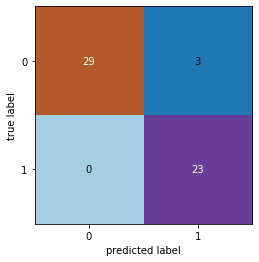

In [18]:
fig, ax = plot_confusion_matrix(cm, cmap = cmap.Paired)
plt.show()

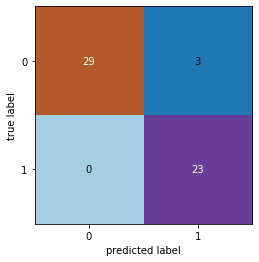

In [19]:
cm = confusion_matrix(y_target=test_ds[label], 
                      y_predicted=predictor.predict(test_ds),
                      binary=True, 
                      positive_label=1)
fig, ax = plot_confusion_matrix(cm, cmap = cmap.Paired)
plt.show()

---

# 2. H2O

H2O’s AutoML can be used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit. Stacked Ensembles – one based on all previously trained models, another one on the best model of each family – will be automatically trained on collections of individual models to produce highly predictive ensemble models which, in most cases, will be the top performing models in the AutoML Leaderboard.

H2O offers a number of model explainability methods that apply to AutoML objects (groups of models), as well as individual models (e.g. leader model). Explanations can be generated automatically with a single function call, providing a simple interface to exploring and explaining the AutoML models.

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

### 2.1 Specific Libraries

In [22]:
import h2o
from h2o.automl import H2OAutoML
h2o.init("http://h2o:54321")

Checking whether there is an H2O instance running at http://h2o:54321 . connected.


H2O cluster uptime:,1 min 49 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.1
H2O cluster version age:,"2 years, 1 month and 10 days !!!"
H2O cluster name:,root
H2O cluster total nodes:,1
H2O cluster free memory:,7.105 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


### 2.2 Preprocess

La siguiente linea importa desde ruta web/local

In [23]:
#h2o.import_file('/data/cell_TP.csv')

Para importar desde pandas, y así poder juntar la X y la label:

In [24]:
h2oframe = h2o.H2OFrame(ds)

Parse progress: |█████████████████████████████████████████████████████████| 100%


Si es clasificación (y la columna no es categórica) hay que transformar la columna objetivo a factor

In [25]:
h2oframe[label] = h2oframe[label].asfactor()

Hay que pasarle el nombre de las variables X y el nombre de la columna objetivo.

In [26]:
columns = h2oframe.columns
columns.remove(label)

### 2.3 Define and train predictor:

In [29]:
predictor = H2OAutoML(max_models=5)
predictor.train(x=columns, y=label, training_frame=h2oframe)

AutoML progress: |████████████████████████████████████████████████████████| 100%


### 2.4 Results: 

In [30]:
lb = predictor.leaderboard
lb.table

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_3_AutoML_20210826_124110,0.993076,0.100432,0.0286433,0.159351,0.0253926
DeepLearning_1_AutoML_20210826_124110,0.993022,0.121203,0.0403549,0.189359,0.035857
GBM_grid_1_AutoML_20210826_124110_model_2,0.99267,0.322895,0.0403549,0.199775,0.0399102
GBM_2_AutoML_20210826_124110,0.991074,0.111808,0.0286433,0.168564,0.028414
GBM_4_AutoML_20210826_124110,0.990912,0.112061,0.0286433,0.165708,0.0274592
GBM_grid_1_AutoML_20210826_124110_model_1,0.990858,0.108034,0.0234231,0.159627,0.0254809
XGBoost_grid_1_AutoML_20210826_124110_model_2,0.989262,0.176781,0.0297522,0.194815,0.0379527
DRF_1_AutoML_20210826_124531,0.98745,0.322436,0.0254787,0.15882,0.0252237
GBM_1_AutoML_20210826_124110,0.987044,0.119763,0.0254787,0.162692,0.0264688
XGBoost_3_AutoML_20210826_124110,0.986152,0.132035,0.0276966,0.182702,0.03338


<bound method H2OFrame.table of >

In [31]:
predictor.predict(h2oframe)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
0,0.999748,0.000252139
0,0.999748,0.000251968
0,0.999702,0.000297681
0,0.999748,0.00025217
0,0.999748,0.000252259
0,0.999697,0.000303106
0,0.999748,0.000252441
0,0.999748,0.000252449
0,0.999748,0.00025231
0,0.999748,0.000252407


---

# 3. Mcfly AutoML

The goal of mcfly is to ease using deep learning technology for time series classification. The advantages of deep learning algorithms is that it can handle raw data directly with no need to compute signal features, it does not require a expert domain knowledge about the data, and it has been shown to be competitive with conventional machine learning techniques. As an example, you can apply mcfly on, accelerometer data for activity classification, as shown in the mcfly tutorial.

MCfly no es tan "automático", es decir, solo entrena redes neuronales y no se muy bien si hace mucho HPO o son arquitecturas fijas.



https://mcfly.readthedocs.io/en/latest/index.html

### 3.1 Specific Libraries:

In [32]:
#from mcfly import find_architecture.find_best_architecture

In [33]:
import mcfly
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

### 3.2 Preprocess:

In [34]:
ds_tmp = pd.read_csv(files[index_file], index_col=0)

Aquí poner el shape pertinente

In [35]:
len(files)

4

In [36]:
size = (275, 180, len(files))

Transformamos los datos tal que 
(num_samples, num_timesteps, num_channels)

In [37]:
X = np.zeros(size)
for i in range(len(files)):
    ds_tmp = pd.read_csv(files[i], index_col=0)
    X[:,:,i] = ds_tmp.values

Mcfly utiliza onehotencoding en la columna objetivo.

In [38]:
enc = OneHotEncoder()
Y = pd.read_csv('/data/labels.csv')[label].values
Y = enc.fit_transform(Y.reshape((-1,1))).toarray()
Y = enc.fit_transform(pd.read_csv('/data/labels.csv')[label].values.reshape((1,-1))).toarray().reshape((-1,1))

Separamos train y test:

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)

In [40]:
X_train = np.nan_to_num(X_train)
X_val = np.nan_to_num(X_val)
y_train = np.nan_to_num(y_train)
y_val = np.nan_to_num(y_val)

Normalizar

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)

input_size = (num_samples, num_timesteps, num_channels)

In [42]:
print('X_train.shape', X_train.shape)
print('X_val.shape', X_val.shape)
print('y_train.shape', y_train.shape)
print('y_val.shape', y_val.shape)

X_train.shape (220, 180, 4)
X_val.shape (55, 180, 4)
y_train.shape (220, 1)
y_val.shape (55, 1)


In [43]:
class_weight = {0}

### 3.3 Define and train predictor:

In [44]:
best_model, best_params, best_model_type, knn_acc = \
mcfly.find_architecture.find_best_architecture(X_train,
                                               y_train,
                                               X_val,
                                               y_val,
                                               verbose=True,
                                               number_of_models=5,
                                               nr_epochs=100,
                                               subset_size=100,
                                               outputpath=None,
                                               model_path=None,
                                               metric='accuracy',
                                               class_weight=None)

Generated models will be trained on subset of the data (subset size: 100).
Training model 0 InceptionTime
Epoch 1/100
5/5 [==============================] - ETA: 11s - loss: 0.0000e+00 - accuracy: 1.000 - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.000 - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.00 - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.00 - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.00 - 5s 435ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.00 - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.00 - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.00 - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.00 - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.00 - 1s 272ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.00 - ETA: 0s - loss: 0.0000e+00 - accurac

5/5 [==============================] - ETA: 1s - loss: 0.5849 - accuracy: 1.00 - ETA: 1s - loss: 0.5834 - accuracy: 1.00 - ETA: 0s - loss: 0.5818 - accuracy: 1.00 - ETA: 0s - loss: 0.5803 - accuracy: 1.00 - ETA: 0s - loss: 0.5787 - accuracy: 1.00 - 2s 435ms/step - loss: 0.5777 - accuracy: 1.0000 - val_loss: 0.5544 - val_accuracy: 1.0000
Epoch 11/100
5/5 [==============================] - ETA: 1s - loss: 0.5544 - accuracy: 1.00 - ETA: 1s - loss: 0.5530 - accuracy: 1.00 - ETA: 0s - loss: 0.5515 - accuracy: 1.00 - ETA: 0s - loss: 0.5500 - accuracy: 1.00 - ETA: 0s - loss: 0.5486 - accuracy: 1.00 - 2s 442ms/step - loss: 0.5476 - accuracy: 1.0000 - val_loss: 0.5258 - val_accuracy: 1.0000
Epoch 12/100
5/5 [==============================] - ETA: 1s - loss: 0.5258 - accuracy: 1.00 - ETA: 1s - loss: 0.5244 - accuracy: 1.00 - ETA: 0s - loss: 0.5230 - accuracy: 1.00 - ETA: 0s - loss: 0.5216 - accuracy: 1.00 - ETA: 0s - loss: 0.5203 - accuracy: 1.00 - 2s 413ms/step - loss: 0.5194 - accuracy: 1.0000

5/5 [==============================] - ETA: 1s - loss: 0.2013 - accuracy: 1.00 - ETA: 1s - loss: 0.2009 - accuracy: 1.00 - ETA: 0s - loss: 0.2005 - accuracy: 1.00 - ETA: 0s - loss: 0.2002 - accuracy: 1.00 - ETA: 0s - loss: 0.1998 - accuracy: 1.00 - 2s 437ms/step - loss: 0.1995 - accuracy: 1.0000 - val_loss: 0.1940 - val_accuracy: 1.0000
Epoch 34/100
5/5 [==============================] - ETA: 1s - loss: 0.1940 - accuracy: 1.00 - ETA: 1s - loss: 0.1937 - accuracy: 1.00 - ETA: 0s - loss: 0.1934 - accuracy: 1.00 - ETA: 0s - loss: 0.1930 - accuracy: 1.00 - ETA: 0s - loss: 0.1927 - accuracy: 1.00 - 2s 419ms/step - loss: 0.1924 - accuracy: 1.0000 - val_loss: 0.1873 - val_accuracy: 1.0000
Epoch 35/100
5/5 [==============================] - ETA: 1s - loss: 0.1873 - accuracy: 1.00 - ETA: 1s - loss: 0.1869 - accuracy: 1.00 - ETA: 0s - loss: 0.1866 - accuracy: 1.00 - ETA: 0s - loss: 0.1863 - accuracy: 1.00 - ETA: 0s - loss: 0.1860 - accuracy: 1.00 - 2s 440ms/step - loss: 0.1858 - accuracy: 1.0000

5/5 [==============================] - ETA: 1s - loss: 0.1084 - accuracy: 1.00 - ETA: 0s - loss: 0.1083 - accuracy: 1.00 - ETA: 0s - loss: 0.1082 - accuracy: 1.00 - ETA: 0s - loss: 0.1081 - accuracy: 1.00 - ETA: 0s - loss: 0.1080 - accuracy: 1.00 - 2s 411ms/step - loss: 0.1079 - accuracy: 1.0000 - val_loss: 0.1064 - val_accuracy: 1.0000
Epoch 57/100
5/5 [==============================] - ETA: 1s - loss: 0.1064 - accuracy: 1.00 - ETA: 1s - loss: 0.1063 - accuracy: 1.00 - ETA: 0s - loss: 0.1063 - accuracy: 1.00 - ETA: 0s - loss: 0.1062 - accuracy: 1.00 - ETA: 0s - loss: 0.1061 - accuracy: 1.00 - 2s 420ms/step - loss: 0.1060 - accuracy: 1.0000 - val_loss: 0.1046 - val_accuracy: 1.0000
Epoch 58/100
5/5 [==============================] - ETA: 1s - loss: 0.1046 - accuracy: 1.00 - ETA: 1s - loss: 0.1045 - accuracy: 1.00 - ETA: 0s - loss: 0.1044 - accuracy: 1.00 - ETA: 0s - loss: 0.1043 - accuracy: 1.00 - ETA: 0s - loss: 0.1042 - accuracy: 1.00 - 2s 457ms/step - loss: 0.1042 - accuracy: 1.0000

5/5 [==============================] - ETA: 1s - loss: 0.0782 - accuracy: 1.00 - ETA: 1s - loss: 0.0782 - accuracy: 1.00 - ETA: 0s - loss: 0.0781 - accuracy: 1.00 - ETA: 0s - loss: 0.0781 - accuracy: 1.00 - ETA: 0s - loss: 0.0781 - accuracy: 1.00 - 2s 433ms/step - loss: 0.0780 - accuracy: 1.0000 - val_loss: 0.0773 - val_accuracy: 1.0000
Epoch 80/100
5/5 [==============================] - ETA: 1s - loss: 0.0773 - accuracy: 1.00 - ETA: 1s - loss: 0.0773 - accuracy: 1.00 - ETA: 0s - loss: 0.0773 - accuracy: 1.00 - ETA: 0s - loss: 0.0772 - accuracy: 1.00 - ETA: 0s - loss: 0.0772 - accuracy: 1.00 - 2s 415ms/step - loss: 0.0771 - accuracy: 1.0000 - val_loss: 0.0765 - val_accuracy: 1.0000
Epoch 81/100
5/5 [==============================] - ETA: 1s - loss: 0.0765 - accuracy: 1.00 - ETA: 1s - loss: 0.0764 - accuracy: 1.00 - ETA: 0s - loss: 0.0764 - accuracy: 1.00 - ETA: 0s - loss: 0.0763 - accuracy: 1.00 - ETA: 0s - loss: 0.0763 - accuracy: 1.00 - 2s 412ms/step - loss: 0.0763 - accuracy: 1.0000

5/5 [==============================] - ETA: 0s - loss: 0.1611 - accuracy: 1.00 - ETA: 0s - loss: 0.1568 - accuracy: 1.00 - ETA: 0s - loss: 0.1531 - accuracy: 1.00 - ETA: 0s - loss: 0.1499 - accuracy: 1.00 - ETA: 0s - loss: 0.1471 - accuracy: 1.00 - 1s 188ms/step - loss: 0.1452 - accuracy: 1.0000 - val_loss: 0.1149 - val_accuracy: 1.0000
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 0.1149 - accuracy: 1.00 - ETA: 0s - loss: 0.1143 - accuracy: 1.00 - ETA: 0s - loss: 0.1136 - accuracy: 1.00 - ETA: 0s - loss: 0.1130 - accuracy: 1.00 - ETA: 0s - loss: 0.1123 - accuracy: 1.00 - 1s 166ms/step - loss: 0.1119 - accuracy: 1.0000 - val_loss: 0.1004 - val_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 0.1004 - accuracy: 1.00 - ETA: 0s - loss: 0.0994 - accuracy: 1.00 - ETA: 0s - loss: 0.0983 - accuracy: 1.00 - ETA: 0s - loss: 0.0971 - accuracy: 1.00 - ETA: 0s - loss: 0.0959 - accuracy: 1.00 - 1s 231ms/step - loss: 0.0951 - accuracy: 1.0000 -

5/5 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 1.00 - ETA: 0s - loss: 0.0047 - accuracy: 1.00 - ETA: 0s - loss: 0.0046 - accuracy: 1.00 - ETA: 0s - loss: 0.0046 - accuracy: 1.00 - ETA: 0s - loss: 0.0046 - accuracy: 1.00 - 1s 175ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 26/100
5/5 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 1.00 - ETA: 0s - loss: 0.0042 - accuracy: 1.00 - ETA: 0s - loss: 0.0042 - accuracy: 1.00 - ETA: 0s - loss: 0.0042 - accuracy: 1.00 - ETA: 0s - loss: 0.0041 - accuracy: 1.00 - 1s 180ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 27/100
5/5 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 1.00 - ETA: 0s - loss: 0.0038 - accuracy: 1.00 - ETA: 0s - loss: 0.0038 - accuracy: 1.00 - ETA: 0s - loss: 0.0037 - accuracy: 1.00 - ETA: 0s - loss: 0.0037 - accuracy: 1.00 - 1s 179ms/step - loss: 0.0037 - accuracy: 1.0000

5/5 [==============================] - ETA: 0s - loss: 4.5322e-04 - accuracy: 1.00 - ETA: 0s - loss: 4.5076e-04 - accuracy: 1.00 - ETA: 0s - loss: 4.4831e-04 - accuracy: 1.00 - ETA: 0s - loss: 4.4590e-04 - accuracy: 1.00 - ETA: 0s - loss: 4.4350e-04 - accuracy: 1.00 - 1s 176ms/step - loss: 4.4190e-04 - accuracy: 1.0000 - val_loss: 4.0594e-04 - val_accuracy: 1.0000
Epoch 48/100
5/5 [==============================] - ETA: 0s - loss: 4.0594e-04 - accuracy: 1.00 - ETA: 0s - loss: 4.0372e-04 - accuracy: 1.00 - ETA: 0s - loss: 4.0153e-04 - accuracy: 1.00 - ETA: 0s - loss: 3.9935e-04 - accuracy: 1.00 - ETA: 0s - loss: 3.9719e-04 - accuracy: 1.00 - 1s 182ms/step - loss: 3.9575e-04 - accuracy: 1.0000 - val_loss: 3.6339e-04 - val_accuracy: 1.0000
Epoch 49/100
5/5 [==============================] - ETA: 0s - loss: 3.6339e-04 - accuracy: 1.00 - ETA: 0s - loss: 3.6139e-04 - accuracy: 1.00 - ETA: 0s - loss: 3.5941e-04 - accuracy: 1.00 - ETA: 0s - loss: 3.5745e-04 - accuracy: 1.00 - ETA: 0s - loss: 3

5/5 [==============================] - ETA: 0s - loss: 3.8593e-05 - accuracy: 1.00 - ETA: 0s - loss: 3.8352e-05 - accuracy: 1.00 - ETA: 0s - loss: 3.8115e-05 - accuracy: 1.00 - ETA: 0s - loss: 3.7880e-05 - accuracy: 1.00 - ETA: 0s - loss: 3.7647e-05 - accuracy: 1.00 - 1s 175ms/step - loss: 3.7492e-05 - accuracy: 1.0000 - val_loss: 3.4011e-05 - val_accuracy: 1.0000
Epoch 69/100
5/5 [==============================] - ETA: 0s - loss: 3.4011e-05 - accuracy: 1.00 - ETA: 0s - loss: 3.3798e-05 - accuracy: 1.00 - ETA: 0s - loss: 3.3587e-05 - accuracy: 1.00 - ETA: 0s - loss: 3.3378e-05 - accuracy: 1.00 - ETA: 0s - loss: 3.3172e-05 - accuracy: 1.00 - 1s 165ms/step - loss: 3.3034e-05 - accuracy: 1.0000 - val_loss: 2.9946e-05 - val_accuracy: 1.0000
Epoch 70/100
5/5 [==============================] - ETA: 0s - loss: 2.9946e-05 - accuracy: 1.00 - ETA: 0s - loss: 2.9757e-05 - accuracy: 1.00 - ETA: 0s - loss: 2.9570e-05 - accuracy: 1.00 - ETA: 0s - loss: 2.9385e-05 - accuracy: 1.00 - ETA: 0s - loss: 2

5/5 [==============================] - ETA: 0s - loss: 2.2297e-06 - accuracy: 1.00 - ETA: 0s - loss: 2.2136e-06 - accuracy: 1.00 - ETA: 0s - loss: 2.1978e-06 - accuracy: 1.00 - ETA: 0s - loss: 2.1821e-06 - accuracy: 1.00 - ETA: 0s - loss: 2.1667e-06 - accuracy: 1.00 - 1s 185ms/step - loss: 2.1564e-06 - accuracy: 1.0000 - val_loss: 1.9260e-06 - val_accuracy: 1.0000
Epoch 90/100
5/5 [==============================] - ETA: 0s - loss: 1.9260e-06 - accuracy: 1.00 - ETA: 0s - loss: 1.9121e-06 - accuracy: 1.00 - ETA: 0s - loss: 1.8983e-06 - accuracy: 1.00 - ETA: 0s - loss: 1.8847e-06 - accuracy: 1.00 - ETA: 0s - loss: 1.8713e-06 - accuracy: 1.00 - 1s 195ms/step - loss: 1.8623e-06 - accuracy: 1.0000 - val_loss: 1.6621e-06 - val_accuracy: 1.0000
Epoch 91/100
5/5 [==============================] - ETA: 0s - loss: 1.6621e-06 - accuracy: 1.00 - ETA: 0s - loss: 1.6500e-06 - accuracy: 1.00 - ETA: 0s - loss: 1.6380e-06 - accuracy: 1.00 - ETA: 0s - loss: 1.6262e-06 - accuracy: 1.00 - ETA: 0s - loss: 1

Epoch 11/100
5/5 [==============================] - ETA: 1s - loss: 1.0857e-04 - accuracy: 1.00 - ETA: 1s - loss: 1.0592e-04 - accuracy: 1.00 - ETA: 0s - loss: 1.0338e-04 - accuracy: 1.00 - ETA: 0s - loss: 1.0092e-04 - accuracy: 1.00 - ETA: 0s - loss: 9.8555e-05 - accuracy: 1.00 - 2s 487ms/step - loss: 9.6975e-05 - accuracy: 1.0000 - val_loss: 6.3409e-05 - val_accuracy: 1.0000
Epoch 12/100
5/5 [==============================] - ETA: 1s - loss: 6.3409e-05 - accuracy: 1.00 - ETA: 1s - loss: 6.1661e-05 - accuracy: 1.00 - ETA: 0s - loss: 5.9999e-05 - accuracy: 1.00 - ETA: 0s - loss: 5.8425e-05 - accuracy: 1.00 - ETA: 0s - loss: 5.6941e-05 - accuracy: 1.00 - 2s 518ms/step - loss: 5.5951e-05 - accuracy: 1.0000 - val_loss: 3.6271e-05 - val_accuracy: 1.0000
Epoch 13/100
5/5 [==============================] - ETA: 1s - loss: 3.6271e-05 - accuracy: 1.00 - ETA: 1s - loss: 3.5428e-05 - accuracy: 1.00 - ETA: 0s - loss: 3.4629e-05 - accuracy: 1.00 - ETA: 0s - loss: 3.3864e-05 - accuracy: 1.00 - ETA:

5/5 [==============================] - ETA: 1s - loss: 1.2154e-07 - accuracy: 1.00 - ETA: 1s - loss: 1.2148e-07 - accuracy: 1.00 - ETA: 0s - loss: 1.2143e-07 - accuracy: 1.00 - ETA: 0s - loss: 1.2137e-07 - accuracy: 1.00 - ETA: 0s - loss: 1.2132e-07 - accuracy: 1.00 - 2s 515ms/step - loss: 1.2129e-07 - accuracy: 1.0000 - val_loss: 1.2054e-07 - val_accuracy: 1.0000
Epoch 33/100
5/5 [==============================] - ETA: 1s - loss: 1.2054e-07 - accuracy: 1.00 - ETA: 1s - loss: 1.2050e-07 - accuracy: 1.00 - ETA: 0s - loss: 1.2047e-07 - accuracy: 1.00 - ETA: 0s - loss: 1.2043e-07 - accuracy: 1.00 - ETA: 0s - loss: 1.2040e-07 - accuracy: 1.00 - 2s 501ms/step - loss: 1.2038e-07 - accuracy: 1.0000 - val_loss: 1.1996e-07 - val_accuracy: 1.0000
Epoch 34/100
5/5 [==============================] - ETA: 1s - loss: 1.1996e-07 - accuracy: 1.00 - ETA: 1s - loss: 1.1994e-07 - accuracy: 1.00 - ETA: 0s - loss: 1.1992e-07 - accuracy: 1.00 - ETA: 0s - loss: 1.1991e-07 - accuracy: 1.00 - ETA: 0s - loss: 1

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Best model: model  0
Model type:  InceptionTime
Hyperparameters:  {'learning_rate': 0.00025536164770718195, 'regularization_rate': 0.0005590713834809168, 'network_depth': 4, 'filters_number': 50, 'max_kernel_size': 27}
accuracy on validation set:  1.0
Accuracy of kNN on validation set 1.0


In [47]:
help(mcfly.find_architecture)

Help on module mcfly.find_architecture in mcfly:

NAME
    mcfly.find_architecture

DESCRIPTION
    Summary:
    This module provides the main functionality of mcfly: searching for an
    optimal model architecture. The work flow is as follows:
    Function generate_models from modelgen.py generates and compiles models.
    Function train_models_on_samples trains those models.
    Function find_best_architecture is wrapper function that combines
    these steps.
    Example function calls can be found in the tutorial notebook
    (https://github.com/NLeSC/mcfly-tutorial)

FUNCTIONS
    find_best_architecture(X_train, y_train, X_val, y_val, verbose=True, number_of_models=5, nr_epochs=5, subset_size=100, outputpath=None, model_path=None, metric='accuracy', class_weight=None, **kwargs)
        Tries out a number of models on a subsample of the data,
        and outputs the best found architecture and hyperparameters.
        
        Parameters
        ----------
        X_train : Support

probabilidades predicción:

### 3.4 Results:

In [46]:
best_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 180, 4)]     0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 180, 4)       16          input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 180, 32)      128         batch_normalization[0][0]        
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 180, 4)       0           batch_normalization[0][0]        
______________________________________________________________________________________________

__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 180, 50)      43200       conv1d_16[0][0]                  
__________________________________________________________________________________________________
conv1d_18 (Conv1D)              (None, 180, 50)      20800       conv1d_16[0][0]                  
__________________________________________________________________________________________________
conv1d_19 (Conv1D)              (None, 180, 50)      9600        conv1d_16[0][0]                  
__________________________________________________________________________________________________
conv1d_20 (Conv1D)              (None, 180, 50)      10000       max_pooling1d_3[0][0]            
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 180, 200)     0           conv1d_17[0][0]                  
          